In [ ]:
import os
import numpy as np
import struct

def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,
                                '%s-labels.idx1-ubyte' %kind)
    image_path = os.path.join(path,
                                '%s-images.idx3-ubyte' %kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                    lbpath.read(8))
        labels = np.fromfile(lbpath,
                                dtype=np.uint8)
    with open(image_path, 'rb') as impath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                                impath.read(16))
        images = np.fromfile(impath,
                                dtype=np.uint8).reshape(len(labels), 28*28)
    return images, labels

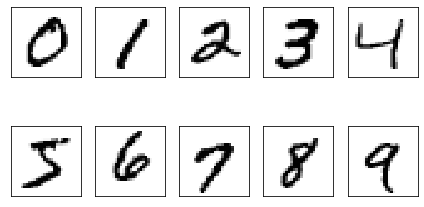

In [26]:
import matplotlib.pyplot as plot 
train, train_labels = load_mnist('./')
text, test_labels = load_mnist('./', 't10k')
fig, ax = plot.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = train[train_labels == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plot.tight_layout()
plot.show()

In [ ]:
train, train_labels = load_mnist('./')
test, test_labels = load_mnist('./', 't10k')
np.savetxt('train_img.csv', train, fmt='%i', delimiter=',')
np.savetxt('test_img.csv', test, fmt='%i', delimiter=',')
np.savetxt('train_labels.csv', train_labels, fmt='%i', delimiter=',')
np.savetxt('test_labels.csv', test_labels, fmt='%i', delimiter=',')

In [ ]:
X_train = np.genfromtxt('train_img.csv',
                        dtype=int, delimiter=',')
y_train = np.genfromtxt('train_labels.csv',
                        dtype=int, delimiter=',')
X_test = np.genfromtxt('test_img.csv',
                       dtype=int, delimiter=',')
y_test = np.genfromtxt('test_labels.csv',
                       dtype=int, delimiter=',')